# Principal Component Analysis (PCA) auf den MNIST Daten

In diesem Notebook führen wir die PCA auf den Daten der MNIST Datenbank mithilfe des **scikit-learn** Pakets durch

Der MNIST (Modified National Institute of Standards) Datensatz ist ein Datensatz mit 70.000 Bildern von handgeschriebenen Ziffern. Dieser Datensatz wird weltweit als Standarddatensatz genutzt, um zu prüfen wie gut Machine Learning Verfahren die Bilderkennung beherrschen. Darüber hinaus zeigt es ein Anwendungbeispiel bei dem man mit herkömmlichen Programmiermethoden schnell an Grenzen stößt, das aber mit Künstlichen Neuronalen Netzen sehr gut lösbar ist.

## Daten einlesen

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# MNIST laden (nur 10000 Beispiele zur Vereinfachung)
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:10000]
y = mnist.target[:10000].astype(int)

# Überblick über die Daten verschaffen:
print("Datenform:", X.shape)
print("Label-Verteilung:", np.bincount(y))

Datenform: (10000, 784)
Label-Verteilung: [1001 1127  991 1032  980  863 1014 1070  944  978]


## Ziffern plotten

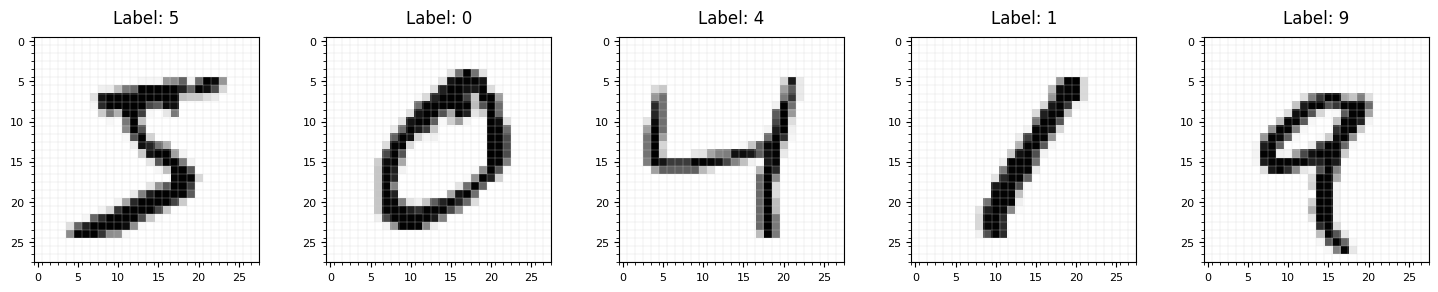

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(18, 4), gridspec_kw={'wspace': 0.3})

for i, ax in enumerate(axes):

    ax.imshow(
        X.iloc[i].values.reshape(28, 28),
        cmap='Greys', # Greys | gray
        interpolation='none',  # Scharfe Pixelgrenzen
        aspect='equal'         # Quadratische Pixel
    )

    ax.set_title(f"Label: {y[i]}", pad=10)

    # Gitterlinien zwischen allen Pixeln (fein und hellgrau)
    ax.set_xticks(np.arange(-0.5, 28, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 28, 1), minor=True)
    ax.grid(which='minor', color='lightgray', linestyle='-', linewidth=0.3, alpha=0.7)

    # Achsen anzeigen (mit Beschriftung)
    ax.set_xticks(np.arange(0, 28, 5))  # Jede 5. X-Position beschriften
    ax.set_yticks(np.arange(0, 28, 5))  # Jede 5. Y-Position beschriften
    ax.tick_params(axis='both', labelsize=8)  # Kleinere Beschriftung

plt.show()

## Daten zentrieren

In [8]:
scaler = StandardScaler(with_std=False)  # with_std=True standardisiert die Daten
X_centered = scaler.fit_transform(X)

## PCA durchführen

In [10]:
# Perform PCA
pca = PCA(n_components=0.95) # Als Kriterium wählen wir 95% erklärte Varianz. Das Kit bietet auch andere Möglichkeiten / Kriterien zur Auswahl
X_pca = pca.fit_transform(X_centered)

## Visualisierung der projizierten Daten

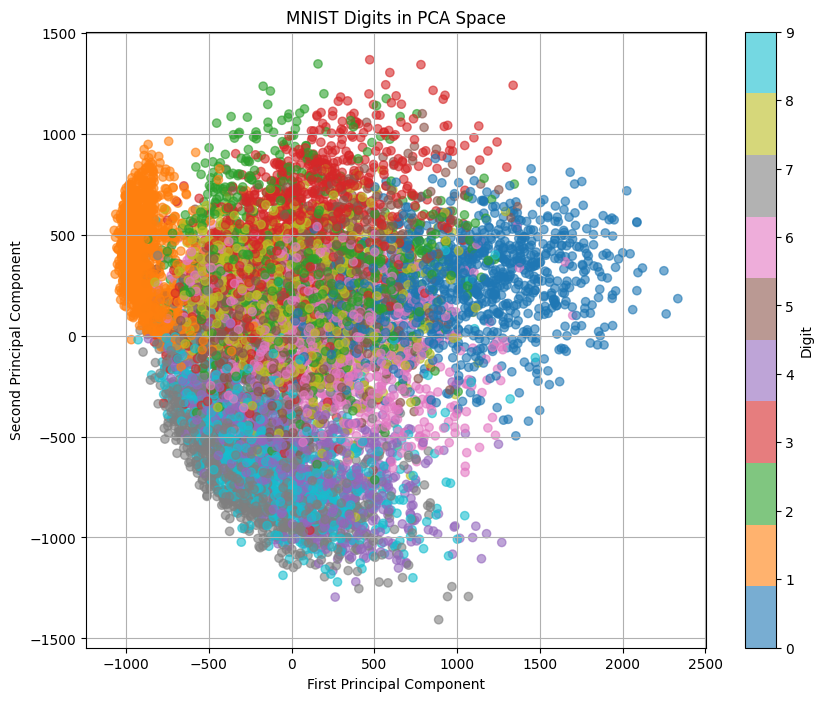

In [11]:
# Plot data against first two principal components
plt.figure(figsize=(10,8))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Digit')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('MNIST Digits in PCA Space')
plt.grid(True)
plt.show()

## Rekonstruktion der Daten

In [14]:
# Reconstruct data from PCA components
X_reconstructed = pca.inverse_transform(X_pca) + X.values.mean(axis=0) #Zurück projizieren und wieder verschieben

### Plot der rekonstruierten Daten

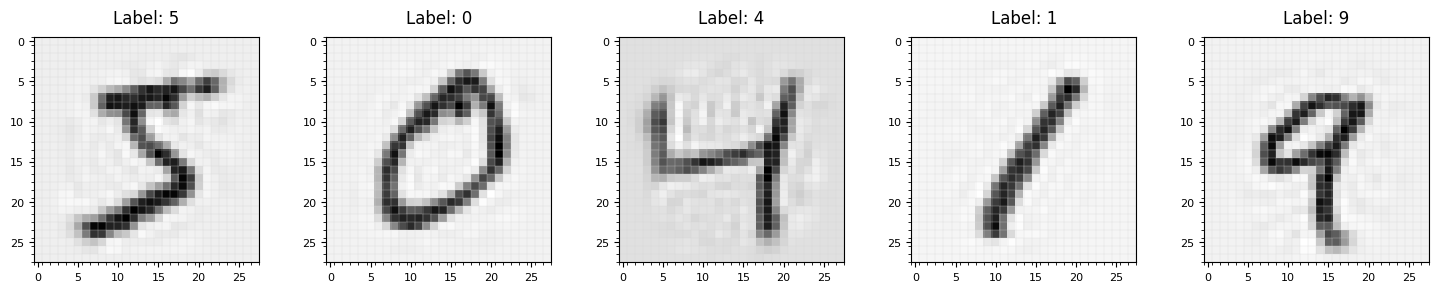

In [19]:
fig, axes = plt.subplots(1, 5, figsize=(18, 4), gridspec_kw={'wspace': 0.3})

for i, ax in enumerate(axes):

    ax.imshow(
        X_reconstructed[i].reshape(28, 28),
        cmap='Greys', # Greys | gray
        interpolation='none',  # Scharfe Pixelgrenzen
        aspect='equal'         # Quadratische Pixel
    )

    ax.set_title(f"Label: {y[i]}", pad=10)

    # Gitterlinien zwischen allen Pixeln (fein und hellgrau)
    ax.set_xticks(np.arange(-0.5, 28, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 28, 1), minor=True)
    ax.grid(which='minor', color='lightgray', linestyle='-', linewidth=0.3, alpha=0.7)

    # Achsen anzeigen (mit Beschriftung)
    ax.set_xticks(np.arange(0, 28, 5))  # Jede 5. X-Position beschriften
    ax.set_yticks(np.arange(0, 28, 5))  # Jede 5. Y-Position beschriften
    ax.tick_params(axis='both', labelsize=8)  # Kleinere Beschriftung

plt.show()

### Plot der originalen Daten zum Vergleich

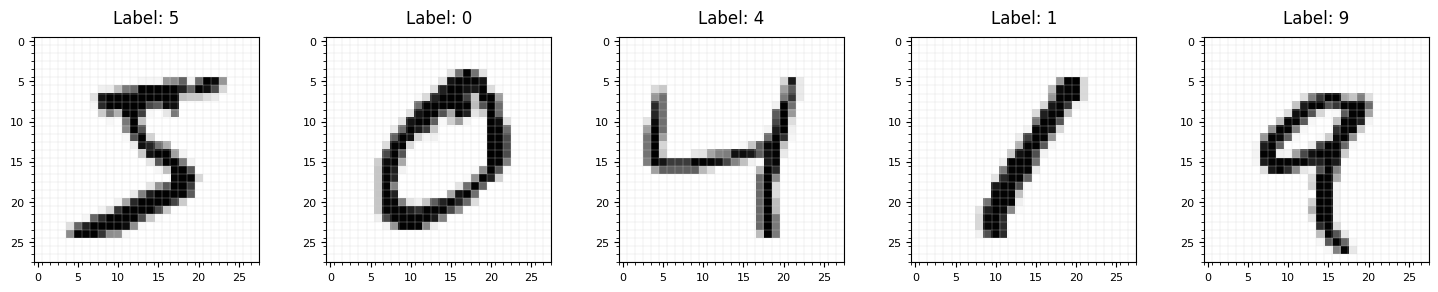

In [20]:
fig, axes = plt.subplots(1, 5, figsize=(18, 4), gridspec_kw={'wspace': 0.3})

for i, ax in enumerate(axes):

    ax.imshow(
        X.iloc[i].values.reshape(28, 28),
        cmap='Greys', # Greys | gray
        interpolation='none',  # Scharfe Pixelgrenzen
        aspect='equal'         # Quadratische Pixel
    )

    ax.set_title(f"Label: {y[i]}", pad=10)

    # Gitterlinien zwischen allen Pixeln (fein und hellgrau)
    ax.set_xticks(np.arange(-0.5, 28, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 28, 1), minor=True)
    ax.grid(which='minor', color='lightgray', linestyle='-', linewidth=0.3, alpha=0.7)

    # Achsen anzeigen (mit Beschriftung)
    ax.set_xticks(np.arange(0, 28, 5))  # Jede 5. X-Position beschriften
    ax.set_yticks(np.arange(0, 28, 5))  # Jede 5. Y-Position beschriften
    ax.tick_params(axis='both', labelsize=8)  # Kleinere Beschriftung

plt.show()